In [167]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [168]:
#Loading the dataset
model=pd.read_csv('ML model.csv')

In [169]:
model.shape

(9240, 37)

#There are 9240 rows and 37 columns

In [170]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#There are object,float and integer datatypes.
#There are null values present

In [171]:
model.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [172]:
#removing unwanted columns
to_drop=['Prospect ID','Lead Number','Total Time Spent on Website','Magazine','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score','City','Lead Profile','Lead Quality','Tags',
       'Asymmetrique Profile Score']
model.drop(to_drop,inplace=True,axis=1)

In [173]:
model.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,Page Visited on Website,NaN,Select,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,2.5,Email Opened,India,Select,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,2.0,Email Opened,India,Business Administration,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,1.0,Unreachable,India,Media and Advertising,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1.0,Converted to Lead,India,Select,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [174]:
model.isnull().values.any()

True

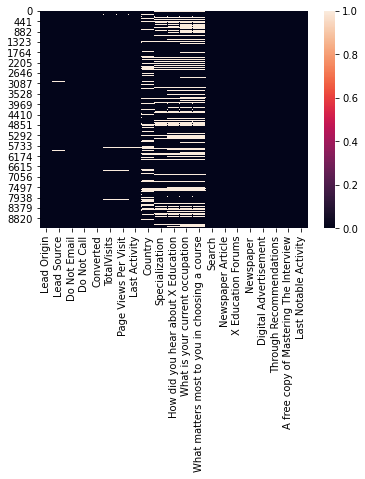

In [175]:
#presence of null values can be checked in visual method using heatmap
sns.heatmap(model.isnull())

In [176]:
model.columns[model.isnull().any()]

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

In [177]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 7802 

In [178]:
model.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [179]:
#converting object datatype columns into integer using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for val in list1:
    model[val]=le.fit_transform(model[val].astype(str))

In [180]:
#filling the na values with mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")
model['Lead Source']=imp.fit_transform(model['Lead Source'].values.reshape(-1,1))
model['TotalVisits']=imp.fit_transform(model['TotalVisits'].values.reshape(-1,1))
model['Page Views Per Visit']=imp.fit_transform(model['Page Views Per Visit'].values.reshape(-1,1))
model['Country']=imp.fit_transform(model['Country'].values.reshape(-1,1))
model['Specialization']=imp.fit_transform(model['Specialization'].values.reshape(-1,1))
model['How did you hear about X Education']=imp.fit_transform(model['How did you hear about X Education'].values.reshape(-1,1))
model['What is your current occupation']=imp.fit_transform(model['What is your current occupation'].values.reshape(-1,1))
model['What matters most to you in choosing a course']=imp.fit_transform(model['What matters most to you in choosing a course'].values.reshape(-1,1))

In [181]:
model.isnull().values.any()

False

In [182]:
model.describe()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.702489,4.279545,0.079437,0.000216,0.385390,18.244913,45.485065,7.810173,19.081818,11.077056,...,4.625758,0.879978,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554,7.692208
std,0.633613,3.157121,0.270435,0.014711,0.486714,14.082876,37.351563,3.771235,11.221520,5.847515,...,0.950095,1.365696,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559,3.162836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,12.000000,7.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,3.000000,0.000000,0.000000,0.000000,14.000000,43.000000,9.000000,12.000000,12.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,1.000000,6.000000,0.000000,0.000000,1.000000,29.000000,75.000000,12.000000,37.000000,15.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
max,4.000000,21.000000,1.000000,1.000000,1.000000,41.000000,114.000000,17.000000,38.000000,19.000000,...,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


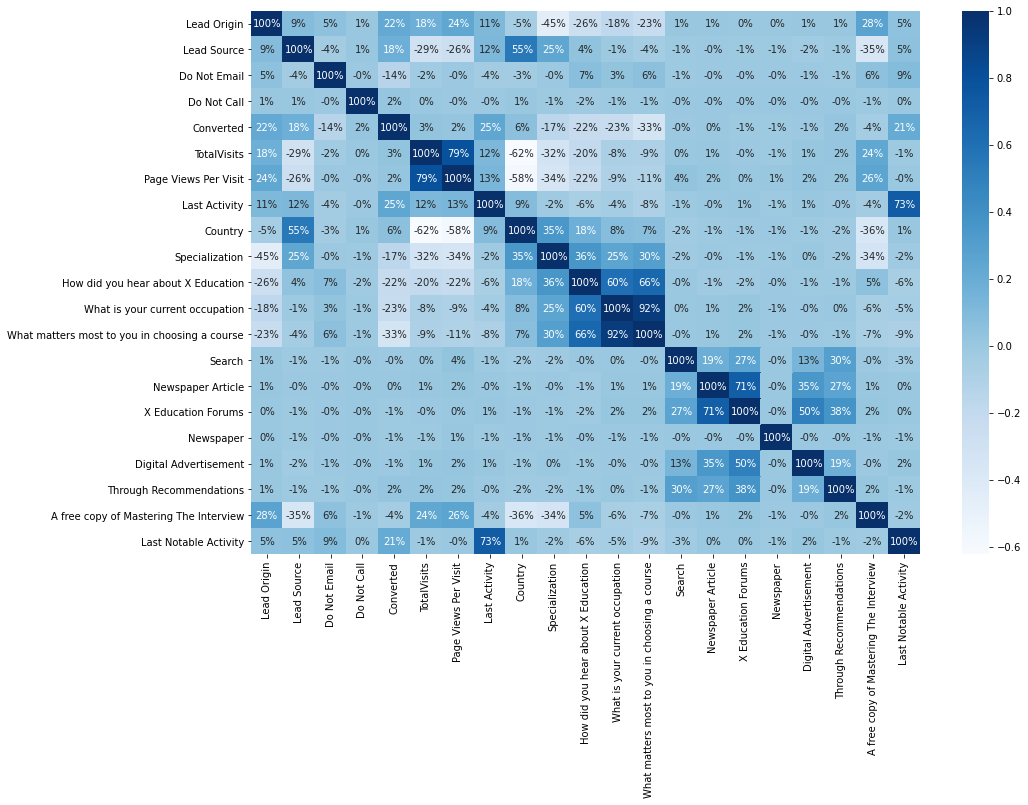

In [183]:
modelcor=model.corr()
plt.figure(figsize=(15,10))
sns.heatmap(modelcor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

In [184]:
#correlation can be expressed in matrix form
corr_matrix=model.corr()
print(corr_matrix["Converted"].sort_values(ascending=False))

Converted                                        1.000000
Last Activity                                    0.247075
Lead Origin                                      0.223725
Last Notable Activity                            0.210445
Lead Source                                      0.180431
Country                                          0.055819
TotalVisits                                      0.032085
Page Views Per Visit                             0.022164
Through Recommendations                          0.018607
Do Not Call                                      0.018581
Newspaper Article                                0.003465
Search                                          -0.002261
Digital Advertisement                           -0.005789
Newspaper                                       -0.008238
X Education Forums                              -0.008238
A free copy of Mastering The Interview          -0.039820
Do Not Email                                    -0.135580
Specialization

In [97]:
collist=model.columns.values
ncol=22
nrows=10

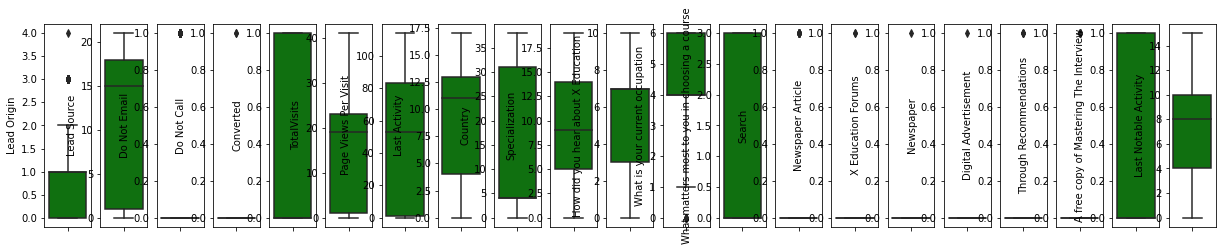

In [58]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(model[collist[i]],color='green',orient='v')

# UNIVARIATE ANALYSIS

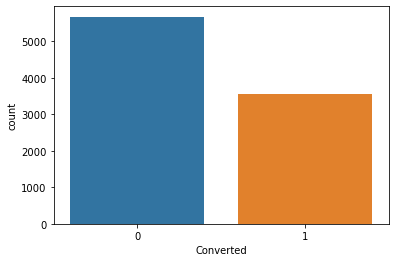

In [59]:
sns.countplot(model["Converted"])

#1- convertion ,
0-no convertion

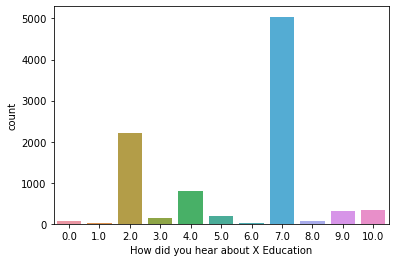

In [61]:
sns.countplot(model["How did you hear about X Education"])

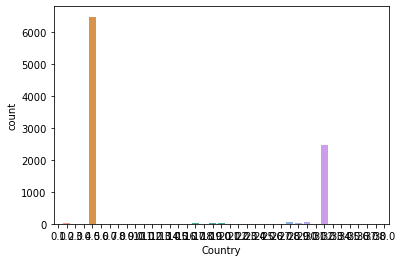

In [62]:
sns.countplot(model["Country"])

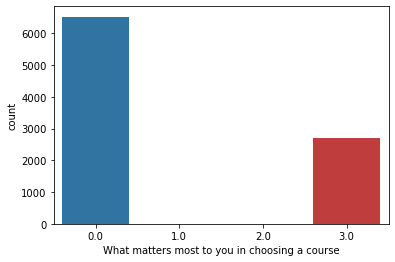

In [63]:
sns.countplot(model["What matters most to you in choosing a course"])

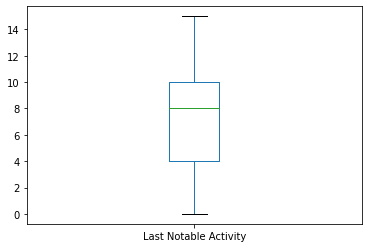

In [65]:
model["Last Notable Activity"].plot.box()

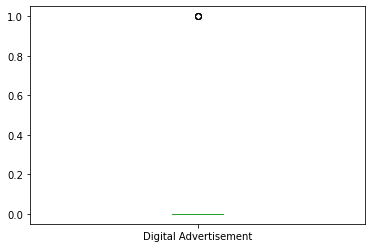

In [66]:
model["Digital Advertisement"].plot.box()

#Boxplots are the best method to detect outliers

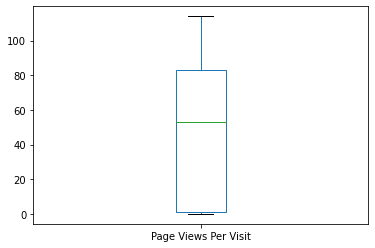

In [67]:
model["Page Views Per Visit"].plot.box()

# BIVARIATE ANALYSIS

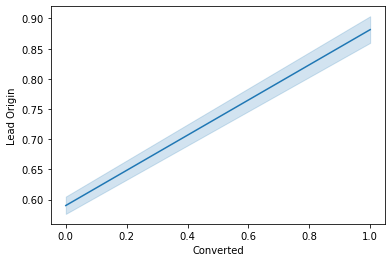

In [69]:
sns.lineplot(x="Converted",y="Lead Origin",data=model)
plt.show()

In [70]:
model.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

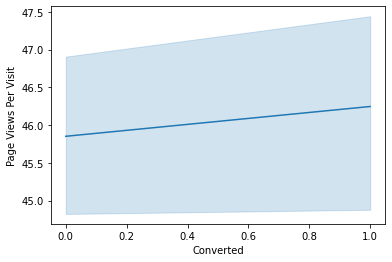

In [71]:
sns.lineplot(x="Converted",y="Page Views Per Visit",data=model)
plt.show()

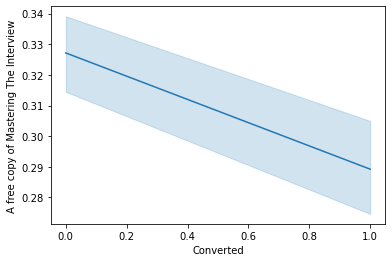

In [72]:
sns.lineplot(x="Converted",y="A free copy of Mastering The Interview",data=model)
plt.show()

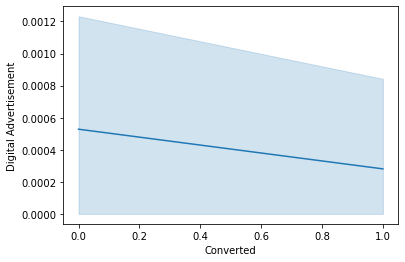

In [73]:
sns.lineplot(x="Converted",y="Digital Advertisement",data=model)
plt.show()

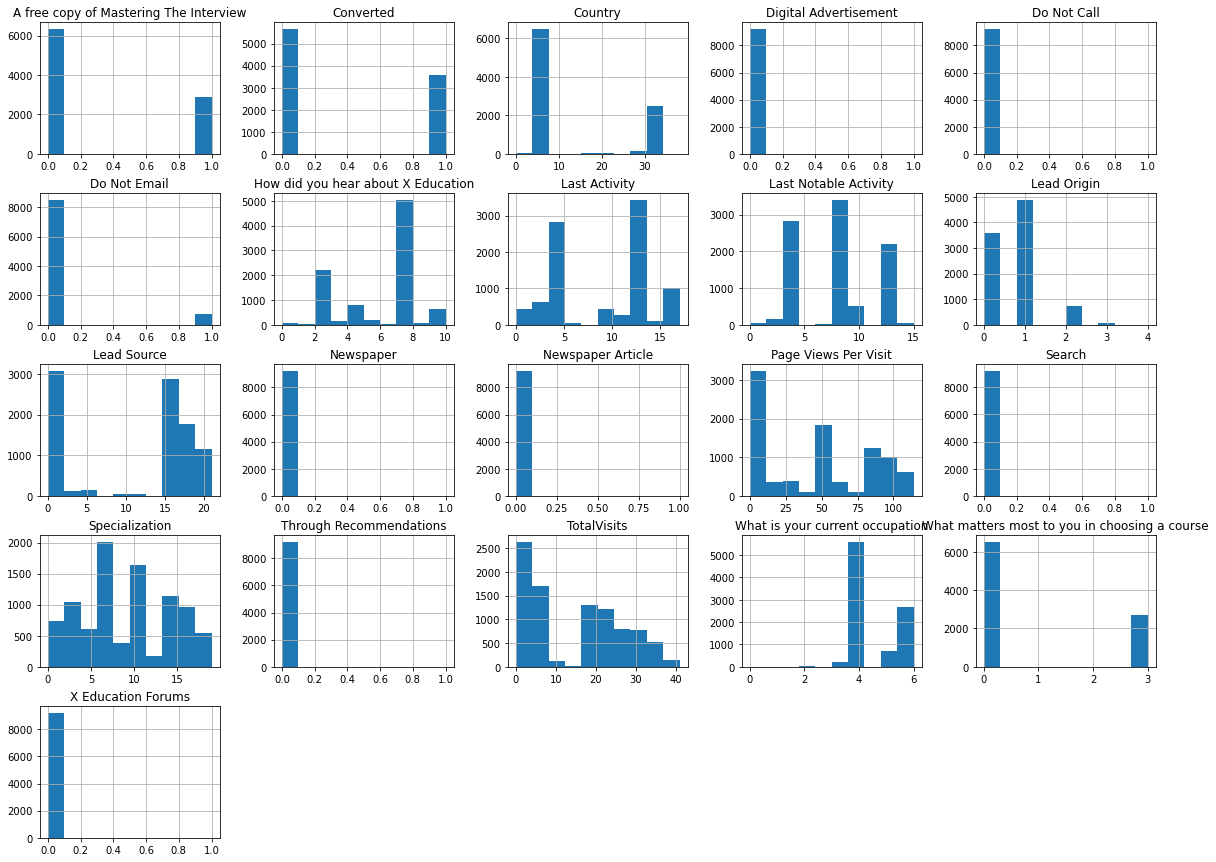

In [75]:
model.hist(figsize=(20,15))
plt.show()

In [185]:
x=model.drop('Converted',axis=1)

In [187]:
x.skew()

Lead Origin                                       0.493201
Lead Source                                       1.134251
Do Not Email                                      3.110947
Do Not Call                                      67.959544
TotalVisits                                      -0.078742
Page Views Per Visit                              0.104880
Last Activity                                     0.021978
Country                                           0.935573
Specialization                                   -0.249474
How did you hear about X Education               -0.050570
What is your current occupation                   0.402138
What matters most to you in choosing a course     0.908075
Search                                           25.636203
Newspaper Article                                67.959544
X Education Forums                               96.124919
Newspaper                                        96.124919
Digital Advertisement                            48.0390

In [188]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])
x.skew()

Lead Origin                                       0.493201
Lead Source                                       0.021258
Do Not Email                                      3.110947
Do Not Call                                      67.959544
TotalVisits                                      -0.078742
Page Views Per Visit                              0.104880
Last Activity                                     0.021978
Country                                           0.685183
Specialization                                   -0.249474
How did you hear about X Education               -0.050570
What is your current occupation                   0.402138
What matters most to you in choosing a course     0.907714
Search                                           25.636203
Newspaper Article                                67.959544
X Education Forums                               96.124919
Newspaper                                        96.124919
Digital Advertisement                            48.0390

In [189]:
from scipy.stats import zscore
columns=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
        'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in range(len(columns)):
    model[columns[i]]=zscore(model[columns[i]])
    for j in range(len(model[columns[i]])):
        if model[columns[i]][j]>3 or model[columns[i]][j]<-3:
            model[columns[i]].replace(model[columns[i]][j],model[columns[i]].median(),inplace=True)
            model[columns[i]]=np.cbrt((model[columns[i]]))

In [190]:
x

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,0,1.945910,0.000000,0.0,0.0,0.0,10,3.637586,15.0,6.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,8
1,0,2.079442,0.000000,0.0,33.0,57.0,5,2.564949,15.0,6.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
2,1,0.693147,0.000000,0.0,14.0,43.0,5,2.564949,1.0,6.0,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,4
3,1,0.693147,0.000000,0.0,1.0,1.0,13,2.564949,11.0,9.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,8
4,1,1.386294,0.000000,0.0,14.0,1.0,1,2.564949,15.0,4.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0.693147,0.693147,0.0,39.0,62.0,4,3.258097,8.0,6.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
9236,1,0.693147,0.000000,0.0,14.0,43.0,12,2.564949,11.0,6.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,12
9237,1,0.693147,0.693147,0.0,14.0,43.0,12,2.564949,1.0,6.0,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,12
9238,1,1.386294,0.000000,0.0,26.0,70.0,12,2.564949,7.0,3.0,6.0,1.386294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,12


In [191]:
y=model[["Converted"]]
y

,Converted
0,0
1,0
2,1
3,0
4,1
...,...
9235,1
9236,0
9237,0
9238,1


In [192]:
print(x.shape)
print(y.shape)

(9240, 20)
(9240, 1)


In [193]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.10876332,  0.76304686, -0.29375505, ..., -0.02753453,
        -0.67428477,  0.09732052],
       [-1.10876332,  0.98602746, -0.29375505, ..., -0.02753453,
        -0.67428477, -1.16743561],
       [ 0.46957177, -1.32890948, -0.29375505, ..., -0.02753453,
         1.48305293, -1.16743561],
       ...,
       [ 0.46957177, -1.32890948,  3.4041968 , ..., -0.02753453,
         1.48305293,  1.36207666],
       [ 0.46957177, -0.17144101, -0.29375505, ..., -0.02753453,
        -0.67428477,  1.36207666],
       [ 0.46957177, -1.32890948, -0.29375505, ..., -0.02753453,
         1.48305293,  0.09732052]])

In [194]:
#applying PCA
from sklearn.decomposition import PCA
c=10
pca=PCA(n_components=c)
x=pca.fit_transform(x)
x.shape

(9240, 10)

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 49 is 0.7391774891774892


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score,auc

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=49)

In [204]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7392, 10)
(1848, 10)
(7392, 1)
(1848, 1)


In [207]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score : 0.7094155844155844
[[938 189]
 [348 373]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1127
           1       0.66      0.52      0.58       721

    accuracy                           0.71      1848
   macro avg       0.70      0.67      0.68      1848
weighted avg       0.70      0.71      0.70      1848



In [208]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [209]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.41181669, 0.78431051, 0.13832482, ..., 0.29913268, 0.79029467,
       0.3222784 ])

In [210]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.87311446e-04,
       8.87311446e-04, 8.87311446e-04, 8.87311446e-04, 8.87311446e-04,
       1.77462289e-03, 2.66193434e-03, 2.66193434e-03, 2.66193434e-03,
       2.66193434e-03, 3.54924579e-03, 3.54924579e-03, 3.54924579e-03,
       3.54924579e-03, 3.54924579e-03, 3.54924579e-03, 3.54924579e-03,
       3.54924579e-03, 3.54924579e-03, 3.54924579e-03, 3.54924579e-03,
       3.54924579e-03, 4.43655723e-03, 4.43655723e-03, 7.09849157e-03,
       7.09849157e-03, 7.98580302e-03, 7.98580302e-03, 9.76042591e-03,
       1.06477374e-02, 1.06477374e-02, 1.15350488e-02, 1.15350488e-02,
       1.15350488e-02, 1.33096717e-02, 1.33096717e-02, 1.41969831e-02,
       1.41969831e-02, 1.59716060e-02, 1.59716060e-02, 1.68589175e-02,
       1.86335404e-02, 1.86335404e-02, 1.95208518e-02, 1.95208518e-02,
       2.21827862e-02, 2.21827862e-02, 2.30700976e-02, 2.30700976e-02,
       2.30700976e-02, 2.48447205e-02, 2.57320319e-02, 2.75066548e-02,
      

In [211]:
tpr

array([0.        , 0.00138696, 0.00416089, 0.00693481, 0.00970874,
       0.01248266, 0.01803051, 0.02080444, 0.02773925, 0.02773925,
       0.0332871 , 0.03744799, 0.05686546, 0.05686546, 0.06102635,
       0.07489598, 0.0776699 , 0.08460472, 0.08737864, 0.09015257,
       0.09153953, 0.09708738, 0.10124827, 0.10679612, 0.11373093,
       0.11373093, 0.12621359, 0.12621359, 0.12898752, 0.12898752,
       0.1331484 , 0.1331484 , 0.1331484 , 0.13730929, 0.13730929,
       0.14008322, 0.14285714, 0.14285714, 0.14701803, 0.14701803,
       0.14840499, 0.14840499, 0.15256588, 0.15256588, 0.15256588,
       0.15533981, 0.15533981, 0.16504854, 0.16504854, 0.17059639,
       0.17059639, 0.17198336, 0.17475728, 0.17475728, 0.17614424,
       0.17614424, 0.18030513, 0.18169209, 0.18169209, 0.18446602,
       0.18446602, 0.18862691, 0.19140083, 0.19278779, 0.19278779,
       0.2149792 , 0.2149792 , 0.21775312, 0.21775312, 0.21914008,
       0.21914008, 0.22052705, 0.22052705, 0.22191401, 0.22191

In [212]:
thresholds

array([1.99881086, 0.99881086, 0.92024275, 0.90110586, 0.89576631,
       0.87989258, 0.86774936, 0.86738869, 0.86718948, 0.86708282,
       0.8600548 , 0.85321296, 0.85205226, 0.84954484, 0.84146153,
       0.83695028, 0.83352016, 0.82895791, 0.82052381, 0.82019525,
       0.81648994, 0.81510179, 0.79746976, 0.79712609, 0.77761496,
       0.77704136, 0.75974058, 0.75334946, 0.75153166, 0.75135876,
       0.7465748 , 0.7455551 , 0.74340671, 0.7373509 , 0.73726695,
       0.73461093, 0.73417605, 0.73284696, 0.7306306 , 0.72940579,
       0.72923213, 0.72895451, 0.72390424, 0.72362836, 0.72250248,
       0.72142896, 0.72008995, 0.71077432, 0.70787846, 0.70574486,
       0.70556756, 0.70416759, 0.70343577, 0.70131151, 0.70090249,
       0.69852952, 0.69836341, 0.69823952, 0.69653217, 0.69407478,
       0.69381568, 0.69194375, 0.69146831, 0.69001517, 0.68746492,
       0.67470497, 0.67351638, 0.67263269, 0.67128884, 0.6706634 ,
       0.66761346, 0.66471029, 0.66467761, 0.66314871, 0.66175

<function matplotlib.pyplot.show(*args, **kw)>

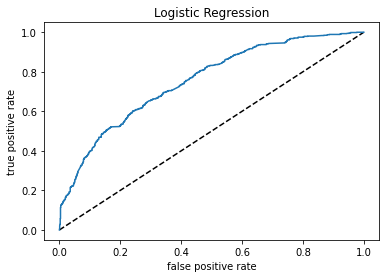

In [213]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show